<a href="https://colab.research.google.com/github/wcngai/colabs/blob/main/RealisticVision_V5_1_(DS_Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

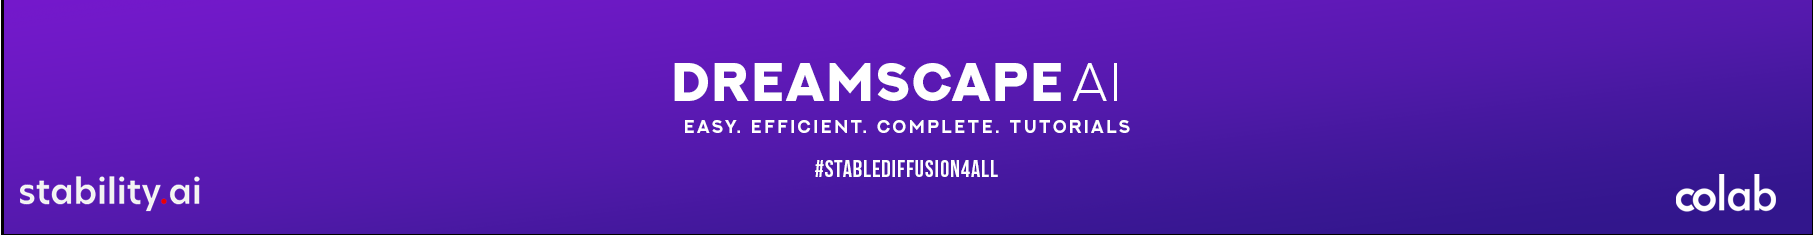

# 🔥 **Step 1. Stable Diffusion Setup** 🔥 : Select your extensions and desired models.

In [7]:
#@markdown ##<b>Colab Fix 9 Sept 2023</b>
#@markdown ####This fix should work for a bit. But don't modify the code too much, the notebook is quite fragile.
#@markdown ####Write me on facebook or instagram if this is not working.
%cd /content
%env TF_CPP_MIN_LOG_LEVEL=1

!apt -y update -qq
!wget https://github.com/camenduru/gperftools/releases/download/v1.0/libtcmalloc_minimal.so.4 -O /content/libtcmalloc_minimal.so.4
%env LD_PRELOAD=/content/libtcmalloc_minimal.so.4

!apt -y install -qq aria2
!pip install -q xformers==0.0.20 triton==2.0.0 -U

!git clone https://github.com/dreamscapeai/ui

!git clone https://huggingface.co/embed/negative /content/ui/embeddings/negative
!git clone https://huggingface.co/embed/lora /content/ui/models/Lora/positive
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/upscale/resolve/main/4x-UltraSharp.pth -d /content/ui/models/ESRGAN -o 4x-UltraSharp.pth
!git clone https://github.com/camenduru/sd-civitai-browser /content/ui/extensions/sd-civitai-browser
!git clone https://github.com/camenduru/control /content/ui/extensions/control
!git clone https://github.com/DominikDoom/a1111-sd-webui-tagcomplete /content/ui/extensions/a1111-sd-webui-tagcomplete

#Colab by Dreamscapeyoutube and Camenduru. Hope you will keep the credits of both to respect the work shared with the community.
!git clone https://github.com/dreamscapeai/adetailer /content/ui/extensions/adetailer
!git clone https://huggingface.co/Bingsu/adetailer /content/ui/models/adetailer
# Civitai-Helper
!git clone https://github.com/butaixianran/Stable-Diffusion-Webui-Civitai-Helper /content/ui/extensions/Stable-Diffusion-Webui-Civitai-Helper
# Roop
!git clone https://github.com/nolanaatama/microsoftexcel-roop /content/ui/extensions/microsoftexcel-roop
# Ultimate SD Upscale
!git clone https://github.com/Coyote-A/ultimate-upscale-for-automatic1111 /content/ui/extensions/ultimate-upscale-for-automatic1111
!git clone https://github.com/fkunn1326/openpose-editor /content/ui/extensions/openpose-editor
!git clone https://github.com/camenduru/tunnels /content/ui/extensions/tunnels
!git clone https://github.com/etherealxx/batchlinks-webui /content/ui/extensions/batchlinks-webui

# CONTROLNET MODELS
# Remove '#' from the beginning of the line(s) below to download the selected ControlNet model(s)
# Openpose
!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_openpose.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_openpose_fp16.safetensors
# Canny
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_canny.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_canny_fp16.safetensors
# Depth
#!curl -Lo /content/ui/extensions/control/models/control_v11f1p_sd15_depth.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_depth_fp16.safetensors
# Inpaint
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_inpaint.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors
# Softedge
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_softedge.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_softedge_fp16.safetensors
# Tile
#!curl -Lo /content/ui/extensions/control/models/control_v11f1e_sd15_tile.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11f1e_sd15_tile_fp16.safetensors
# Ip2p
#!curl -Lo /content/ui/extensions/control/models/control_v11e_sd15_ip2p.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11e_sd15_ip2p_fp16.safetensors
# shuffle
#!curl -Lo /content/ui/extensions/control/models/control_v11e_sd15_shuffle.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11e_sd15_shuffle_fp16.safetensors
# lineart
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_lineart.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_lineart_fp16.safetensors
# mlsd
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_mlsd.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors
# normalbae
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_normalbae.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors
# scribble
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_scribble.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_scribble_fp16.safetensors
# Segmentation
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15_seg.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_seg_fp16.safetensors
# Anime
#!curl -Lo /content/ui/extensions/control/models/control_v11p_sd15s2_lineart_anime.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors

%cd /content/ui
!git reset --hard
!git -C /content/ui/repositories/stable-diffusion-stability-ai reset --hard

!curl -Lo /content/ui/models/Stable-diffusion/realisticvisionv_5_1_VAE.safetensors https://civitai.com/api/download/models/130072

!sed -i -e 's/\["sd_model_checkpoint"\]/\["sd_model_checkpoint","sd_vae","CLIP_stop_at_last_layers"\]/g' /content/ui/modules/shared_options.py

!python launch.py --listen --xformers --no-half-vae --enable-insecure-extension-access --theme dark --gradio-queue --multiple

/content
env: TF_CPP_MIN_LOG_LEVEL=1
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERR

In [ ]:
#@markdown ##<b>⚠️It seems Google hit again with their ban, but they won't beat me :)⚠️</b>
#@markdown ####This old code became obsolete sadly. Don't click on this play button.
#@markdown ####It is just for backup.

# MEMFIX
!curl -Lo memfix.zip https://github.com/nolanaatama/microsoftexcel/raw/main/memfix.zip
!unzip /content/memfix.zip
!apt -y update -qq
%env LD_PRELOAD=/content/libtcmalloc_minimal.so.4

# BASE DOCS (DO NOT TOUCH)
!curl -Lo microsoftexcel.zip https://huggingface.co/nolanaatama/colab/resolve/main/microsoftexcel151.zip
!unzip /content/microsoftexcel.zip

# BASIC EXTENSION
!git clone https://github.com/nolanaatama/microsoftexcel-tunnels /content/microsoftexcel/extensions/microsoftexcel-tunnels
!git clone https://github.com/nolanaatama/microsoftexcel-controlnet /content/microsoftexcel/extensions/microsoftexcel-controlnet
!git clone https://github.com/fkunn1326/openpose-editor /content/microsoftexcel/extensions/openpose-editor
!git clone https://github.com/nolanaatama/microsoftexcel-3d-open-pose-editor /content/microsoftexcel/extensions/microsoftexcel-3d-open-pose-editor
!git clone https://github.com/nolanaatama/a1111-microsoftexcel-tagcomplete /content/microsoftexcel/extensions/a1111-microsoftexcel-tagcomplete
!git clone https://github.com/nolanaatama/a1111-microsoftexcel-locon /content/microsoftexcel/extensions/a1111-microsoftexcel-locon

# YOUR FAVOURITE EXTENSION
# !After Detailer
#!git clone https://github.com/Bing-su/adetailer /content/microsoftexcel/extensions/adetailer
!git clone https://github.com/dreamscapeai/adetailer /content/microsoftexcel/extensions/adetailer
!git clone https://huggingface.co/Bingsu/adetailer /content/microsoftexcel/models/adetailer
# Civitai-Helper
!git clone https://github.com/butaixianran/Stable-Diffusion-Webui-Civitai-Helper /content/microsoftexcel/extensions/Stable-Diffusion-Webui-Civitai-Helper
# Roop
!git clone https://github.com/nolanaatama/microsoftexcel-roop /content/microsoftexcel/extensions/microsoftexcel-roop
# Ultimate SD Upscale
!git clone https://github.com/Coyote-A/ultimate-upscale-for-automatic1111 /content/microsoftexcel/extensions/ultimate-upscale-for-automatic1111
# Mov2mov
#!git clone https://github.com/nolanaatama/microsoftexcel-mov2mov /content/microsoftexcel/extensions/microsoftexcel-mov2mov
# SuperMerger
#!git clone https://github.com/nolanaatama/microsoftexcel-supermerger /content/microsoftexcel/extensions/microsoftexcel-supermerger
# TemporalKit
#!git clone https://github.com/CiaraStrawberry/TemporalKit /content/microsoftexcel/extensions/TemporalKit


# BASIC EMBEDDINGS AND UPSCALER
!mkdir /content/microsoftexcel/models/ESRGAN
!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-images-browser.zip https://huggingface.co/nolanaatama/colab/resolve/main/microsoftexcel-images-browser.zip
!curl -Lo /content/microsoftexcel/embeddings/embeddings.zip https://huggingface.co/nolanaatama/colab/resolve/main/embeddings.zip
!curl -Lo /content/microsoftexcel/models/ESRGAN/upscalers.zip https://huggingface.co/nolanaatama/colab/resolve/main/upscalers.zip
%cd /content/microsoftexcel/extensions
!unzip /content/microsoftexcel/extensions/microsoftexcel-images-browser.zip
%cd /content/microsoftexcel/embeddings
!unzip /content/microsoftexcel/embeddings/embeddings.zip
%cd /content/microsoftexcel/models/ESRGAN
!unzip /content/microsoftexcel/models/ESRGAN/upscalers.zip
!rm upscalers.zip
%cd /content

# MODEL CHECKPOINT
!curl -Lo /content/microsoftexcel/models/Stable-diffusion/realisticvisionv_5_1_VAE.safetensors https://civitai.com/api/download/models/130072
# !curl -Lo /content/microsoftexcel/models/Stable-diffusion/realisticvision_v4_VAE.safetensors https://civitai.com/api/download/models/114367
# !curl -Lo /content/microsoftexcel/models/Stable-diffusion/realisticvision_v3_VAE.safetensors https://civitai.com/api/download/models/105674

# CONTROLNET MODELS
# Remove '#' from the beginning of the line(s) below to download the selected ControlNet model(s)
# Openpose
!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_openpose.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_openpose_fp16.safetensors
# Canny
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_canny.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_canny_fp16.safetensors
# Depth
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11f1p_sd15_depth.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_depth_fp16.safetensors
# Inpaint
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_inpaint.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors
# Softedge
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_softedge.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_softedge_fp16.safetensors
# Tile
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11f1e_sd15_tile.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11f1e_sd15_tile_fp16.safetensors
# Ip2p
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11e_sd15_ip2p.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11e_sd15_ip2p_fp16.safetensors
# shuffle
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11e_sd15_shuffle.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11e_sd15_shuffle_fp16.safetensors
# lineart
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_lineart.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_lineart_fp16.safetensors
# mlsd
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_mlsd.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors
# normalbae
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_normalbae.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors
# scribble
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_scribble.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_scribble_fp16.safetensors
# Segmentation
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15_seg.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15_seg_fp16.safetensors
# Anime
#!curl -Lo /content/microsoftexcel/extensions/microsoftexcel-controlnet/models/control_v11p_sd15s2_lineart_anime.safetensors https://huggingface.co/nolanaatama/models/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors


!rm microsoftexcel.zip
%cd /content/microsoftexcel

# Web UI tunnel
!pip install fastapi==0.90
!COMMANDLINE_ARGS="--share --disable-safe-unpickle --no-half-vae --xformers --enable-insecure-extension --gradio-queue" REQS_FILE="requirements.txt" python launch.py
# Use this command below to use cloudflare tunnel
#!COMMANDLINE_ARGS="--disable-safe-unpickle --no-half-vae --xformers --enable-insecure-extension --gradio-queue --cloudflared" REQS_FILE="requirements.txt" python launch.py

⏰ Depending on the number of models to download, the process should take between 3 and 10 min.⏰ <br> Please be patient until you see this link :


> Example : "Running on local URL:  http://127.0.0.1:7860 <br> Running on public URL: https://xxxxxxxxxxxxx.gradio.live"

🎉  With the public Gradio URL, you can already start to use Stable Diffusion. 🎉

<br>If you desire to add your own Lora library, follow instruction of Step 2 and Step 3.

⬇️ **Before continuing, stop the first cell from running (stop button ⏹️).** ⬇️





 # 🗂️ **Step 2. Mount Google Drive** 🗂️


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cp -r /content/ui/outputs/mov2mov-images/. /content/drive/MyDrive/Stable_Diffusion_Output/.

ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.
ERROR: ld.so: object '/content/libtcmalloc_minimal.so.4' from LD_PRELOAD cannot be preloaded (file too short): ignored.


#📚 **Step 3. Connect your Lora, VAE, Embeddings library** 📚

In [ ]:
# Create a Lora folder within your drive and drop all your lora files inside.
# Locate the path on the side panel (right click) and copy the path below

# LORA from Google drive
# ONLY CHANGE THE FIRST PART below (careful to the format of the link '/content/drive/xxxx.')
!cp -r '/content/drive/MyDrive/LORA/.' '/content/ui/models/Lora'

# VAE from Google Drive
!cp -r '/content/drive/MyDrive/VAE/.' '/content/ui/models/VAE'
#!cp "/content/drive/MyDrive/our_VAE_folder/OURVAEFILE1.pt" "/content/microsoftexcel/models/VAE"

# EMBEDDINGS from Google Drive
!cp -r '/content/drive/MyDrive/EMBEDDINGS.' '/content/ui/embeddings'
#!cp "/content/drive/MyDrive/our_embeddings_textualinversion/OUREMBEDDINGTEXTUALINVERSION1.pt" "/content/microsoftexcel/embeddings"



# Web UI tunnel
!pip install fastapi==0.90
!python launch.py --listen --xformers --no-half-vae --enable-insecure-extension-access --theme dark --gradio-queue --multiple

# Use this command below to use cloudflare tunnel
#!COMMANDLINE_ARGS="--disable-safe-unpickle --no-half-vae --xformers --enable-insecure-extension --gradio-queue --cloudflared" REQS_FILE="requirements.txt" python launch.py

##🌟 Improved and Adapted by Dreamscape AI.
## ❤️ Check out here for more tutorial [Youtube Channel](https://www.youtube.com/channel/UC5rQxfOuPBfEdwCjha9Wsjw)

###🗣️ Shoutout to [Nolan Aatama](https://huggingface.co/nolanaatama) for the amazing base work !
